In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [6]:
#loading the CSV data to a pandas data frame
datzz = pd.read_csv('heart.csv')

In [7]:
datzz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [26]:
#Splitting values into categorical values and continous value
cate_val = []
cont_val = []

for column in datzz.columns:
    if datzz[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [16]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [17]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [18]:
#encoding Categorical Data
datzz['cp'].unique()

array([0, 1, 2, 3])

In [19]:
datzz['sex'].unique()

array([1, 0])

In [20]:
cate_val.remove('sex')
cate_val.remove('target')
pd.get_dummies(datzz,columns=cate_val,drop_first=True)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,164,0.0,1,True,False,False,...,True,False,True,False,False,False,False,False,True,False
1021,60,1,125,258,141,2.8,0,False,False,False,...,True,True,False,True,False,False,False,False,False,True
1022,47,1,110,275,118,1.0,0,False,False,False,...,True,True,False,True,False,False,False,False,True,False
1023,50,0,110,254,159,0.0,1,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
#Feature Scaling
datzz.head()

In [24]:
st = StandardScaler()
datzz[cont_val] = st.fit_transform(datzz[cont_val])

In [25]:
datzz.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


In [30]:
#Scaling the Dataset into the Training Set And Testing Set
#Dependent variable is the target values while the independent variable are the other values or attributes
X = datzz.drop('target', axis = 1)
Y = datzz['target']
print(X,Y)

           age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0    -0.268437    1   0 -0.377636 -0.659332    0        1  0.821321      0   
1    -0.158157    1   0  0.479107 -0.833861    1        0  0.255968      1   
2     1.716595    1   0  0.764688 -1.396233    0        1 -1.048692      1   
3     0.724079    1   0  0.936037 -0.833861    0        1  0.516900      0   
4     0.834359    0   0  0.364875  0.930822    1        1 -1.874977      0   
...        ...  ...  ..       ...       ...  ...      ...       ...    ...   
1020  0.503520    1   1  0.479107 -0.484803    0        1  0.647366      1   
1021  0.613800    1   0 -0.377636  0.232705    0        0 -0.352873      1   
1022 -0.819834    1   0 -1.234378  0.562371    0        0 -1.353113      1   
1023 -0.488996    0   0 -1.234378  0.155137    0        0  0.429923      0   
1024 -0.047877    1   0 -0.663216 -1.124743    0        1 -1.570556      0   

       oldpeak  slope  ca  thal  
0    -0.060888      2   2    

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [32]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,-0.599275,1,2,-0.777449,-1.881036,0,0,-1.005203,0,-0.231177,2,3,2
137,1.054918,0,0,2.763755,1.531978,0,1,0.212479,1,-0.912329,2,0,2
534,-0.047877,0,2,-1.348611,0.407235,0,0,0.777832,0,-0.912329,2,0,2
495,0.503520,1,0,0.193526,-0.232705,0,1,0.516900,0,-0.486609,1,0,3
244,-0.378716,1,2,-0.377636,-0.019392,1,0,0.734343,0,1.131129,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-1.481512,1,2,-0.092055,-0.620548,0,0,0.821321,0,0.790552,1,0,2
71,0.724079,1,0,0.479107,-0.756293,0,0,-0.483339,1,0.705408,2,1,3
106,-0.378716,1,0,0.479107,1.027782,0,1,1.038764,1,0.449976,2,0,3
270,-1.260953,1,0,-1.234378,-0.678724,0,1,0.516900,0,-0.912329,2,0,3


.

.

.

1. Logistic Regression

In [34]:
#Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression

In [35]:
log = LogisticRegression()
log.fit(X_train, Y_train)

LogisticRegression()

In [88]:
Y_pred1 = log.predict(X_test)

In [89]:
accuracy_score(Y_test, Y_pred1)

0.7951219512195122

.

.

.

2. Support vector classifier

In [40]:
#SVM - support vector machine SVC - support vector classifier
from sklearn import svm
svm = svm.SVC()

In [41]:
svm.fit(X_train,Y_train)

SVC()

In [42]:
Y_pred2 = svm.predict(X_test)

In [43]:
accuracy_score(Y_test, Y_pred2)

0.8341463414634146

.

.

.

3. KNeighbors Classifier

In [44]:
#kNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier()

In [49]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [50]:
Y_pred3 = knn.predict(X_test)

In [51]:
accuracy_score(Y_test, Y_pred3)

0.8048780487804879

In [57]:
#This is to find the nearest neighbor
score = []

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    Y_pred4 = knn.predict(X_test)
    score.append(accuracy_score(Y_test, Y_pred4))

In [53]:
score

[0.9853658536585366,
 0.9560975609756097,
 0.9073170731707317,
 0.8585365853658536,
 0.8048780487804879,
 0.8292682926829268,
 0.8195121951219512,
 0.8,
 0.824390243902439,
 0.8097560975609757,
 0.8,
 0.8439024390243902,
 0.8146341463414634,
 0.824390243902439,
 0.8292682926829268,
 0.8292682926829268,
 0.8,
 0.8097560975609757,
 0.7902439024390244,
 0.7902439024390244,
 0.7902439024390244,
 0.7902439024390244,
 0.775609756097561,
 0.7853658536585366,
 0.7804878048780488,
 0.7853658536585366,
 0.7951219512195122,
 0.7951219512195122,
 0.7902439024390244,
 0.7902439024390244,
 0.7804878048780488,
 0.7658536585365854,
 0.7707317073170732,
 0.7658536585365854,
 0.7658536585365854,
 0.7658536585365854,
 0.7658536585365854,
 0.7658536585365854,
 0.7804878048780488]

In [56]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, Y_train)
Y_pred4 = knn.predict(X_test)
accuracy_score(Y_test, Y_pred4)

0.9853658536585366

.

.

.

NON Linear AlGORITHMS

In [58]:
data = pd.read_csv('heart.csv')

In [62]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [60]:
data = data.drop_duplicates()

In [61]:
data.shape

(302, 14)

In [64]:
x = data.drop('target', axis=1)
y = data['target']

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

.

.

.

4. Decision Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt = DecisionTreeClassifier()

In [71]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [74]:
y_pred5 = dt.predict(x_test)

In [81]:
accuracy_score(y_test, y_pred5)

0.7540983606557377

.

.

.

5. Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf = RandomForestClassifier()

In [78]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [80]:
y_pred6 = rf.predict(x_test)

In [82]:
accuracy_score(y_test, y_pred6)

0.8360655737704918

.

.

.

Gradient Boosting Classifier

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
gbc = GradientBoostingClassifier()

In [86]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [87]:
y_pred7 = gbc.predict(x_test)
accuracy_score(y_test, y_pred7)

0.8032786885245902

In [113]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'], 
                           'Accuracy':[accuracy_score(Y_test, Y_pred1),accuracy_score(Y_test, Y_pred2),accuracy_score(Y_test, Y_pred3),accuracy_score(y_test, y_pred5),accuracy_score(y_test, y_pred6),accuracy_score(y_test, y_pred7)]})

In [114]:
final_data

,Models,Accuracy
0,LR,0.795122
1,SVM,0.834146
2,KNN,0.804878
3,DT,0.754098
4,RF,0.836066
5,GB,0.803279


In [123]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='Accuracy'>

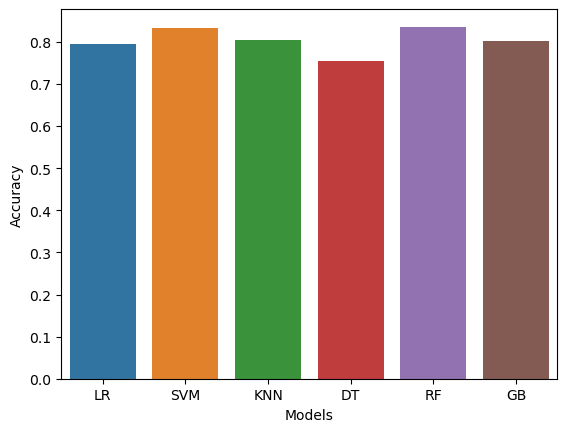

In [128]:
sns.barplot(x=final_data['Models'],y = final_data['Accuracy'])

Random forest for heart diseases prediction

In [129]:
x = data.drop('target', axis=1)
y = data['target']

In [130]:
x.shape

(302, 13)

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

Predicting New Random Data

In [134]:
new_data = pd.DataFrame({
    'age': 52,
    'sex': 1,
    'cp': 0,
    'trestbps': 125,
    'chol': 212,
    'fbs': 0,
    'restecg': 1,
    'thalach': 168,
    'exang': 0,
    'oldpeak': 1.0,
    'slope': 2,
    'ca': 2,
    'thal': 3
}, index=[0])

In [135]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [136]:
rf.predict(new_data)

array([0])

In [138]:
if(rf.predict(new_data)[0] == 0):
    print('This individual does not have heart diseases')
else:
    print('This person has heart diseases')

This individual does not have heart diseases


In [139]:
import joblib

In [140]:
joblib.dump(rf, 'model_joblib_heart')

['model_joblib_heart']